In [5]:
import pandas as pd


In [17]:
data = pd.read_csv('/Users/warrengallon/DATA Python/M2/BIGDATA/dataTweetElon/all_musk_posts.csv')
print(data.head())

                    id                                                url  \
0  1655159652990976000  https://x.com/elonmusk/status/1655159652990976000   
1  1657261624867299339  https://x.com/elonmusk/status/1657261624867299339   
2  1623774484795920384  https://x.com/elonmusk/status/1623774484795920384   
3  1656900119202254854  https://x.com/elonmusk/status/1656900119202254854   
4  1616531874763116544  https://x.com/elonmusk/status/1616531874763116544   

                                          twitterUrl  \
0  https://twitter.com/elonmusk/status/1655159652...   
1  https://twitter.com/elonmusk/status/1657261624...   
2  https://twitter.com/elonmusk/status/1623774484...   
3  https://twitter.com/elonmusk/status/1656900119...   
4  https://twitter.com/elonmusk/status/1616531874...   

                                            fullText  retweetCount  \
0  RT @einarvollset: I read @paulg’s  “How to Mak...           NaN   
1                            https://t.co/Zjn6r15lrR        

/var/folders/dp/9gbs5ccj4p38dhz5lvdhvbnh0000gn/T/ipykernel_3284/3631504177.py:1: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/warrengallon/DATA Python/M2/BIGDATA/dataTweetElon/all_musk_posts.csv')


In [18]:
#On prend juste le texte et la date
data = data[['fullText', 'createdAt', 'likeCount', 'retweetCount', 'replyCount']]
data['createdAt'] = pd.to_datetime(data['createdAt']).dt.date
#nettoyer le texte des virgules, points, emojis, hashtags, mentions
data['fullText'] = data['fullText'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)  # Remove URLs
data['fullText'] = data['fullText'].str.replace(r'@\w+', '', case=False)  # Remove mentions
data['fullText'] = data['fullText'].str.replace(r'#\w+', '', case=False)  # Remove hashtags
data['fullText'] = data['fullText'].str.replace(r'[^\w\s]', '', case=False)  # Remove punctuation
data['fullText'] = data['fullText'].str.replace(r'\n', ' ', case=False)  # Remove new lines
data['fullText'] = data['fullText'].str.strip()  # Remove leading/trailing whitespace
data = data.dropna()
print(data.head())

                                              fullText   createdAt  likeCount  \
802                           @wonderofscience Destiny  2021-02-05   100777.0   
803         @lafebra @Gfilche  https://t.co/M0WwQSTAXm  2021-01-28     2414.0   
804                            @flcnhvy @ErcXspace Yes  2020-12-30     1555.0   
805  @heydave7 Engineering, design &amp; general co...  2020-12-25     2530.0   
806                                        @EvaFoxU !!  2020-09-30     1668.0   

     retweetCount  replyCount  
802        3862.0      3899.0  
803         151.0       139.0  
804          36.0        61.0  
805         152.0       215.0  
806          42.0        85.0  


In [19]:
#analyse quantitative de tweet
data['word_count'] = data['fullText'].apply(lambda x: len(x.split()))
data['char_count'] = data['fullText'].apply(lambda x: len(x))
data['hashtag_count'] = data['fullText'].apply(lambda x: x.count('#'))
data['mention_count'] = data['fullText'].apply(lambda x: x.count('@'))
data['link_count'] = data['fullText'].apply(lambda x: x.count('http'))
print(data.head())

#télécharger le fichier en csv
data.to_csv('/Users/warrengallon/DATA Python/M2/BIGDATA/dataTweetElon/processed_musk_posts.csv', index=False)



                                              fullText   createdAt  likeCount  \
802                           @wonderofscience Destiny  2021-02-05   100777.0   
803         @lafebra @Gfilche  https://t.co/M0WwQSTAXm  2021-01-28     2414.0   
804                            @flcnhvy @ErcXspace Yes  2020-12-30     1555.0   
805  @heydave7 Engineering, design &amp; general co...  2020-12-25     2530.0   
806                                        @EvaFoxU !!  2020-09-30     1668.0   

     retweetCount  replyCount  word_count  char_count  hashtag_count  \
802        3862.0      3899.0           2          24              0   
803         151.0       139.0           3          42              0   
804          36.0        61.0           3          23              0   
805         152.0       215.0          45         297              0   
806          42.0        85.0           2          11              0   

     mention_count  link_count  
802              1           0  
803           

In [20]:
#Analyse statistique descriptives de la data
print(data.describe())
print(data.info())

          likeCount   retweetCount     replyCount    word_count    char_count  \
count  5.429700e+04   54297.000000   54297.000000  54297.000000  54297.000000   
mean   4.200902e+04    5197.720684    2375.592685     10.759729     70.175958   
std    1.070737e+05   14116.761755    6747.502876     10.535851     63.456889   
min    0.000000e+00       0.000000       0.000000      1.000000      1.000000   
25%    1.374000e+03      81.000000     102.000000      3.000000     25.000000   
50%    4.265000e+03     276.000000     271.000000      7.000000     47.000000   
75%    2.933100e+04    2640.000000    1478.000000     15.000000     95.000000   
max    4.372808e+06  610842.000000  357538.000000     63.000000    425.000000   

       hashtag_count  mention_count    link_count  
count   54297.000000    54297.00000  54297.000000  
mean        0.003997        1.11752      0.093578  
std         0.126156        1.14371      0.299474  
min         0.000000        0.00000      0.000000  
25%       

In [28]:
#Télécharger la data pour le btc et le doge

data_crytpo = pd.read_csv('/Users/warrengallon/DATA Python/M2/BIGDATA/dataTweetElon/Crypto Data Since 2015.csv')

#ça récupère btc et doge
data_crytpo = data_crytpo[['Date','Bitcoin (USD)','Dogecoin (DOGE)']]
print(data_crytpo.head())


         Date  Bitcoin (USD)  Dogecoin (DOGE)
0  2015-01-01    1099.671415         0.045930
1  2015-01-02    1135.844985         0.054818
2  2015-01-03    1250.613839         0.049255
3  2015-01-04    1452.916825         0.047298
4  2015-01-05    1479.501487         0.044584


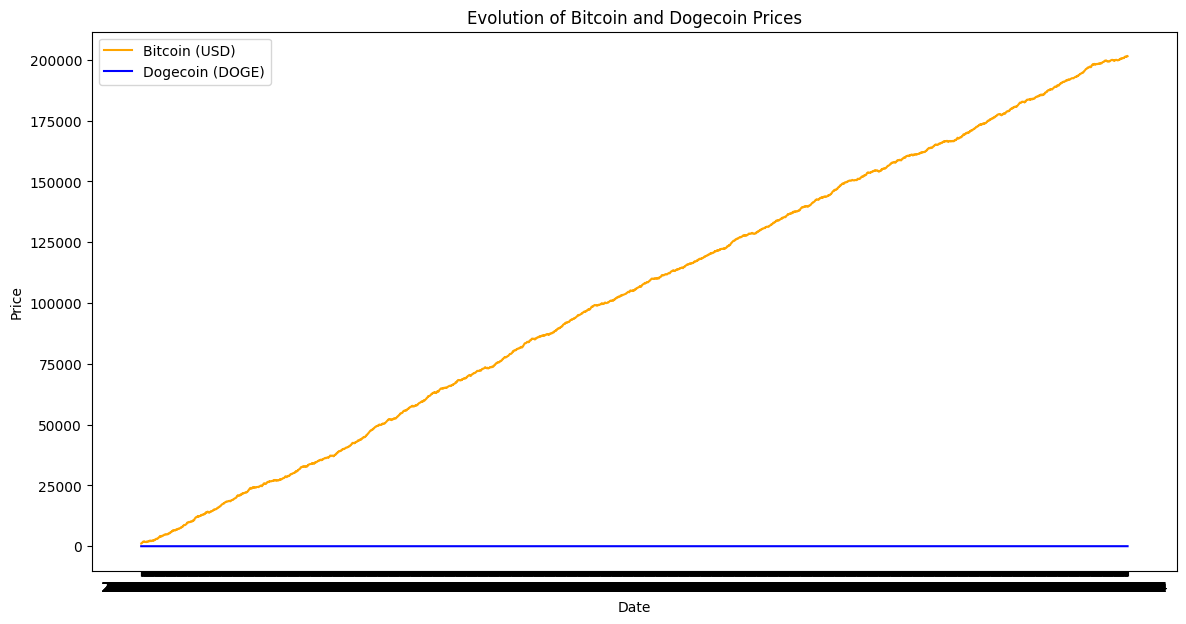

In [29]:
#Graphique de l'évolution du prix du btc et du doge
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(data_crytpo['Date'], data_crytpo['Bitcoin (USD)'], label='Bitcoin (USD)', color='orange')
plt.plot(data_crytpo['Date'], data_crytpo['Dogecoin (DOGE)'], label='Dogecoin (DOGE)', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Evolution of Bitcoin and Dogecoin Prices')
plt.legend()
plt.show()